In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm.auto import tqdm

tqdm.pandas()
pd.options.display.max_colwidth = None
sns.set_style('darkgrid')

In [71]:
dtrain = pd.read_csv('/content/train.csv.zip')
print(dtrain.shape)
dtrain.head()

(404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [72]:
dtrain = dtrain.sample(frac=1, random_state=42).reset_index(drop=True)


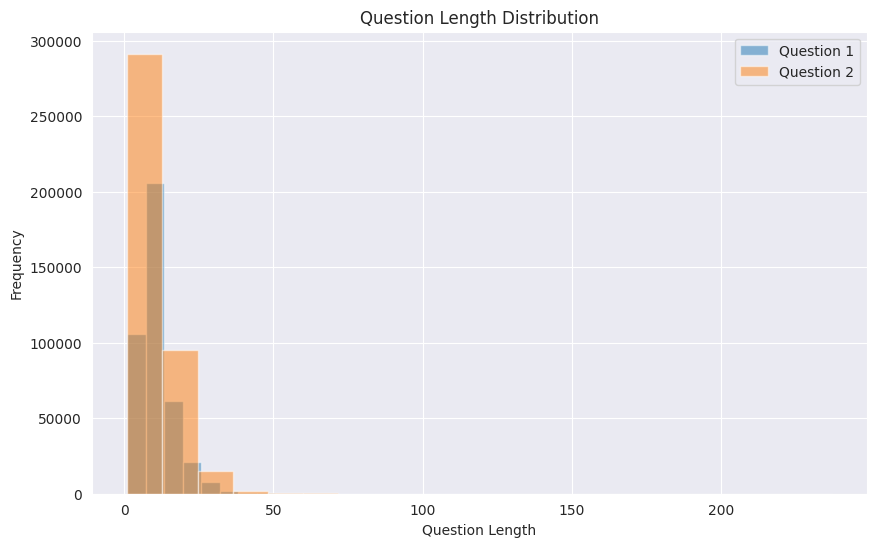

In [73]:
import matplotlib.pyplot as plt
import numpy as np

question_lengths1 = dtrain['question1'].apply(lambda x: len(str(x).split()) if not pd.isna(x) else np.nan)
question_lengths2 = dtrain['question2'].apply(lambda x: len(str(x).split()) if not pd.isna(x) else np.nan)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(question_lengths1.dropna(), bins=20, alpha=0.5, label='Question 1')
plt.hist(question_lengths2.dropna(), bins=20, alpha=0.5, label='Question 2')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Question Length Distribution')
plt.legend()
plt.show()


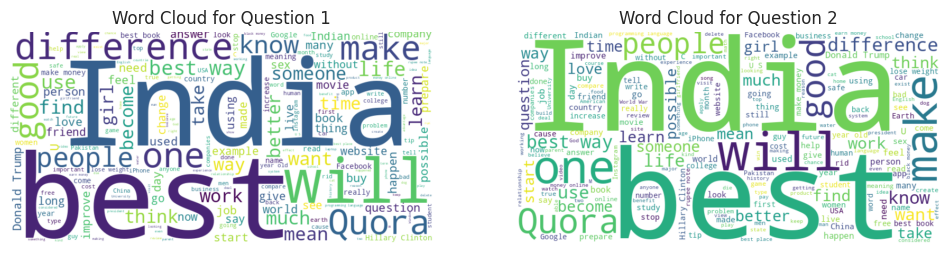

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud



# Convert NaN values to an empty string and convert values to strings
dtrain['question1'] = dtrain['question1'].fillna('').astype(str)
dtrain['question2'] = dtrain['question2'].fillna('').astype(str)

# Create word clouds for question1
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dtrain['question1']))

# Create word clouds for question2
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dtrain['question2']))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Word Cloud for Question 1')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title ('Word Cloud for Question 2')
plt.axis("off")

plt.show()


In [75]:
stop_df = dtrain.iloc[:5000]
test_df = dtrain.iloc[5000:7000]


In [76]:
import nltk
from nltk.stem import PorterStemmer

# Download NLTK data (if not already done)
nltk.download('punkt')

# Create a stemmer object
stemmer = PorterStemmer()

# Apply stemming to the "question1" and "question2" columns and add new columns to stop_df
stop_df['question1_stemmed'] = stop_df['question1'].apply(lambda sentence: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(sentence)]))
stop_df['question2_stemmed'] = stop_df['question2'].apply(lambda sentence: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(sentence)]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-76-93e5458bab93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question1_stemmed'] = stop_df['question1'].apply(lambda sentence: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(sentence)]))
<ipython-input-76-93e5458bab93>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question2_stemmed'] = stop_df['question2'].apply(lambda sentence: ' '.join([stem

In [77]:
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download NLTK data (if not already done)
nltk.download('wordnet')

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the "question1" and "question2" columns and add new columns to stop_df
stop_df['question1'] = stop_df['question1_stemmed'].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)]))
stop_df['question2'] = stop_df['question2_stemmed'].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-77-3e0b1f21f9d5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question1'] = stop_df['question1_stemmed'].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)]))
<ipython-input-77-3e0b1f21f9d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question2'] = stop_df['question2_stemmed'].apply(lambda sentence: ' 

In [78]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (you need to do this if you haven't already)
nltk.download('punkt')

# Define a function for tokenization and lowercase conversion
def tokenize_and_lowercase(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)  # Tokenization using NLTK
        lower_tokens = [token.lower() for token in tokens]  # Convert to lowercase
        return ' '.join(lower_tokens)  # Join tokens back into a single string
    else:
        return text  # Return non-string values as is

# Apply the function to the specified columns
stop_df['question1'] = stop_df['question1'].apply(tokenize_and_lowercase)
stop_df['question2'] = stop_df['question2'].apply(tokenize_and_lowercase)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-78-eabdba836247>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question1'] = stop_df['question1'].apply(tokenize_and_lowercase)
<ipython-input-78-eabdba836247>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question2'] = stop_df['question2'].apply(tokenize_and_lowercase)


In [79]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords data (if not already done)
nltk.download('stopwords')

# Define a function to remove stopwords from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Remove stopwords from the "question1" column and create a new column "question1_cleaned"
stop_df['question1_cleaned'] = stop_df['question1'].apply(remove_stopwords)

# Remove stopwords from the "question2" column and create a new column "question2_cleaned"
stop_df['question2_cleaned'] = stop_df['question2'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-79-eafbfe469537>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question1_cleaned'] = stop_df['question1'].apply(remove_stopwords)
<ipython-input-79-eafbfe469537>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question2_cleaned'] = stop_df['question2'].apply(remove_stopwords)


In [80]:
import string

# Function to remove punctuation from a text
def remove_punctuation(text):
    # Define a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    # Remove punctuation from the text
    text_without_punct = text.translate(translator)
    return text_without_punct

# Remove punctuation from the "question1_cleaned" column
stop_df['question1_cleaned'] = stop_df['question1_cleaned'].apply(remove_punctuation)

# Remove punctuation from the "question2_cleaned" column
stop_df['question2_cleaned'] = stop_df['question2_cleaned'].apply(remove_punctuation)


<ipython-input-80-5ef33e30b445>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question1_cleaned'] = stop_df['question1_cleaned'].apply(remove_punctuation)
<ipython-input-80-5ef33e30b445>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['question2_cleaned'] = stop_df['question2_cleaned'].apply(remove_punctuation)


In [81]:
dtrain.dropna(subset=['question1', 'question2'], inplace=True)

# If you want to reset the index after removing rows
dtrain.reset_index(drop=True, inplace=True)

dtrain.head()

train_df = dtrain.iloc[:9000]
test_df = dtrain.iloc[9000:10000]

In [82]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords data (if not already done)
nltk.download('stopwords')

# Define a function to calculate cosine similarity
def calculate_cosine_similarity(row):
    # Tokenize the cleaned text and convert it to a numeric representation
    question1_cleaned = word_tokenize(row['question1_cleaned'])
    question2_cleaned = word_tokenize(row['question2_cleaned'])

    # Set a minimum token count to avoid empty or near-empty documents
    min_tokens = 2  # Adjust as needed

    # Check if both lists have a sufficient number of tokens
    if len(question1_cleaned) < min_tokens or len(question2_cleaned) < min_tokens:
        return 0.0  # Return 0 similarity for very short documents

    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the vectorizer on the tokenized text
    tfidf_matrix = tfidf_vectorizer.fit_transform([row['question1_cleaned'], row['question2_cleaned']])

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

    return cosine_sim[0][0]

# Apply the calculate_cosine_similarity function to the DataFrame
stop_df['cosine_similarity'] = stop_df.apply(calculate_cosine_similarity, axis=1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-82-ca0e96c5441f>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['cosine_similarity'] = stop_df.apply(calculate_cosine_similarity, axis=1)


In [83]:
# Set a threshold for classifying statements as "same" or "not same"
similarity_threshold = 0.5  # Adjust this threshold as needed

# Create a new column to store the classification result (0 for not same, 1 for same)
stop_df['c_classification'] = stop_df['cosine_similarity'].apply(lambda x: 1 if x >= similarity_threshold else 0)

<ipython-input-83-0efb7df6da12>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['c_classification'] = stop_df['cosine_similarity'].apply(lambda x: 1 if x >= similarity_threshold else 0)


In [84]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,368101,12736,104117,What are some of the best side dishes for crab cakes?,What are some good side dishes for buffalo chicken?,0
2,70497,121486,121487,"Which is more advisable and better material for a crash test in automobiles, ductile or brittle?",What is the best server setup for buddypress?,0
3,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for programming?,1
4,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [85]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union > 0 else 0  # Handle division by zero

# Apply the Jaccard similarity function to the "question1" and "question2" columns
stop_df['jaccard_similarity'] = stop_df.apply(lambda row: jaccard_similarity(set(row['question1'].split()), set(row['question2'].split())), axis=1)


<ipython-input-85-2c61a924b199>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['jaccard_similarity'] = stop_df.apply(lambda row: jaccard_similarity(set(row['question1'].split()), set(row['question2'].split())), axis=1)


In [86]:
# Set a threshold for classifying statements as "same" or "not same"
similarity_threshold = 0.5  # Adjust this threshold as needed

# Create a new column to store the classification result (0 for not same, 1 for same)
stop_df['j_classification'] = stop_df['jaccard_similarity'].apply(lambda x: 1 if x >= similarity_threshold else 0)

<ipython-input-86-0519178f94ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['j_classification'] = stop_df['jaccard_similarity'].apply(lambda x: 1 if x >= similarity_threshold else 0)


In [87]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,368101,12736,104117,What are some of the best side dishes for crab cakes?,What are some good side dishes for buffalo chicken?,0
2,70497,121486,121487,"Which is more advisable and better material for a crash test in automobiles, ductile or brittle?",What is the best server setup for buddypress?,0
3,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for programming?,1
4,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [88]:
from sklearn.metrics import accuracy_score, precision_score

# Actual labels (is_duplicate column) and predicted labels (classification column)
actual_labels = stop_df['is_duplicate']
predicted_labels = stop_df['c_classification']

# Calculate accuracy and precision
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


Accuracy: 0.6704
Precision: 0.5467889908256881


In [89]:
from sklearn.metrics import accuracy_score, precision_score

# Actual labels (is_duplicate column) and predicted labels (classification column)
actual_labels = stop_df['is_duplicate']
predicted_labels = stop_df['j_classification']

# Calculate accuracy and precision
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


Accuracy: 0.6606
Precision: 0.542841348811498


In [90]:
!pip install transformers

In [91]:
!pip install sentencepiece

In [92]:
stop_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_stemmed,question2_stemmed,question1_cleaned,question2_cleaned,cosine_similarity,c_classification,jaccard_similarity,j_classification
0,8067,15738,15739,how do i play pokémon go in korea ?,how do i play pokémon go in china ?,0,how do i play pokémon go in korea ?,how do i play pokémon go in china ?,play pokémon go korea,play pokémon go china,0.602975,1,0.800000,1
1,368101,12736,104117,what are some of the best side dish for crab cake ?,what are some good side dish for buffalo chicken ?,0,what are some of the best side dish for crab cake ?,what are some good side dish for buffalo chicken ?,best side dish crab cake,good side dish buffalo chicken,0.252334,0,0.466667,0
2,70497,121486,121487,"which is more advis and better materi for a crash test in automobil , ductil or brittl ?",what is the best server setup for buddypress ?,0,"which is more advis and better materi for a crash test in automobil , ductil or brittl ?",what is the best server setup for buddypress ?,advis better materi crash test automobil ductil brittl,best server setup buddypress,0.000000,0,0.125000,0
3,226567,254474,258192,how do i improv logic program skill ?,how can i improv my logic skill for program ?,1,how do i improv logic program skill ?,how can i improv my logic skill for program ?,improv logic program skill,improv logic skill program,1.000000,1,0.636364,1
4,73186,48103,3062,how close we are to see 3rd world war ?,how close is a world war iii ?,1,how close we are to see 3rd world war ?,how close is a world war iii ?,close see 3rd world war,close world war iii,0.510149,1,0.384615,0


In [93]:
null_count1 = stop_df['question1'].isnull().sum()
null_count2 = stop_df['question1_cleaned'].isnull().sum()

print(f"Number of null values in 'question1': {null_count1}")
print(f"Number of null values in 'question1_cleaned': {null_count2}")

Number of null values in 'question1': 0
Number of null values in 'question1_cleaned': 0


In [94]:
null_count1 = stop_df['question2'].isnull().sum()
null_count2 = stop_df['question2_cleaned'].isnull().sum()

print(f"Number of null values in 'question2': {null_count1}")
print(f"Number of null values in 'question2_cleaned': {null_count2}")

Number of null values in 'question2': 0
Number of null values in 'question2_cleaned': 0


In [95]:
stop_df.head(100)

,id,qid1,qid2,question1,question2,is_duplicate,question1_stemmed,question2_stemmed,question1_cleaned,question2_cleaned,cosine_similarity,c_classification,jaccard_similarity,j_classification
0,8067,15738,15739,how do i play pokémon go in korea ?,how do i play pokémon go in china ?,0,how do i play pokémon go in korea ?,how do i play pokémon go in china ?,play pokémon go korea,play pokémon go china,0.602975,1,0.800000,1
1,368101,12736,104117,what are some of the best side dish for crab cake ?,what are some good side dish for buffalo chicken ?,0,what are some of the best side dish for crab cake ?,what are some good side dish for buffalo chicken ?,best side dish crab cake,good side dish buffalo chicken,0.252334,0,0.466667,0
2,70497,121486,121487,"which is more advis and better materi for a crash test in automobil , ductil or brittl ?",what is the best server setup for buddypress ?,0,"which is more advis and better materi for a crash test in automobil , ductil or brittl ?",what is the best server setup for buddypress ?,advis better materi crash test automobil ductil brittl,best server setup buddypress,0.000000,0,0.125000,0
3,226567,254474,258192,how do i improv logic program skill ?,how can i improv my logic skill for program ?,1,how do i improv logic program skill ?,how can i improv my logic skill for program ?,improv logic program skill,improv logic skill program,1.000000,1,0.636364,1
4,73186,48103,3062,how close we are to see 3rd world war ?,how close is a world war iii ?,1,how close we are to see 3rd world war ?,how close is a world war iii ?,close see 3rd world war,close world war iii,0.510149,1,0.384615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,142162,225531,225532,doe googl have a differ interview process for their technic infrastructur team ?,how do i pas the interview of a non technic job in googl ?,0,doe googl have a differ interview process for their technic infrastructur team ?,how do i pass the interview of a non technic job in googl ?,doe googl differ interview process technic infrastructur team,pas interview non technic job googl,0.279828,0,0.227273,0
96,104716,172836,172837,whi do mani indian peopl get trap into vote for the nehru-gandhi famili ?,whi do mani indian peopl stare ?,0,whi do mani indian peopl get trap into vote for the nehru-gandhi famili ?,whi do mani indian peopl stare ?,whi mani indian peopl get trap vote nehrugandhi famili,whi mani indian peopl stare,0.439275,0,0.400000,0
97,368729,312719,499129,are car tyre made for specif climat region ?,are either turbocharg or natur aspir car suitabl for a humid and tropic climat ?,0,are car tyre made for specif climat region ?,are either turbocharg or natur aspir car suitabl for a humid and tropic climat ?,car tyre made specif climat region,either turbocharg natur aspir car suitabl humid tropic climat,0.159764,0,0.263158,0
98,359327,21356,20949,how is first time sex experi ?,how doe it feel when a person ha sex for the veri first time ?,1,how is first time sex experi ?,how doe it feel when a person ha sex for the veri first time ?,first time sex experi,doe feel person ha sex veri first time,0.374808,0,0.294118,0


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset (assuming you have already loaded and preprocessed it)

# Preprocessed sentence pairs
sentences1 = stop_df['question1_cleaned']
sentences2 = stop_df['question2_cleaned']

# Labels (is_duplicate)
labels = stop_df['is_duplicate']

# Split the data into training and validation sets
sentences1_train, sentences1_valid, sentences2_train, sentences2_valid, labels_train, labels_valid = train_test_split(
    sentences1, sentences2, labels, test_size=0.2, random_state=42
)

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences1_train + sentences2_train)

sentences1_train_seq = tokenizer.texts_to_sequences(sentences1_train)
sentences2_train_seq = tokenizer.texts_to_sequences(sentences2_train)
sentences1_valid_seq = tokenizer.texts_to_sequences(sentences1_valid)
sentences2_valid_seq = tokenizer.texts_to_sequences(sentences2_valid)

# Set the maximum sequence length
max_sequence_length = 20

# Pad the sequences to the specified length
sentences1_train_seq = pad_sequences(sentences1_train_seq, maxlen=max_sequence_length)
sentences2_train_seq = pad_sequences(sentences2_train_seq, maxlen=max_sequence_length)
sentences1_valid_seq = pad_sequences(sentences1_valid_seq, maxlen=max_sequence_length)
sentences2_valid_seq = pad_sequences(sentences2_valid_seq, maxlen=max_sequence_length)

# Define the model
input_layer1 = Input(shape=(max_sequence_length,))
input_layer2 = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(len(tokenizer.word_index) + 1, 100)
lstm_layer = LSTM(128, return_sequences=True)
dropout_layer = Dropout(0.5)

embedded_seq1 = embedding_layer(input_layer1)
embedded_seq2 = embedding_layer(input_layer2)

lstm_seq1 = lstm_layer(embedded_seq1)
lstm_seq2 = lstm_layer(embedded_seq2)

lstm_seq1 = dropout_layer(lstm_seq1)
lstm_seq2 = dropout_layer(lstm_seq2)

# Merge both sentence sequences
merged = Concatenate()([lstm_seq1, lstm_seq2])
dense_layer = Dense(128, activation='relu')(merged)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

new_model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)

# Compile the model
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
new_model.fit([sentences1_train_seq, sentences2_train_seq], labels_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the validation set
accuracy = new_model.evaluate([sentences1_valid_seq, sentences2_valid_seq], labels_valid)[1]
print(f'Validation Accuracy: {accuracy}')


Epoch 1/20
100/100 [==============================] - 23s 189ms/step - loss: 0.6637 - accuracy: 0.6274 - val_loss: 0.6497 - val_accuracy: 0.6405
Epoch 2/20
100/100 [==============================] - 17s 169ms/step - loss: 0.6278 - accuracy: 0.6463 - val_loss: 0.6465 - val_accuracy: 0.6487
Epoch 3/20
100/100 [==============================] - 18s 176ms/step - loss: 0.5799 - accuracy: 0.6723 - val_loss: 0.6747 - val_accuracy: 0.6483
Epoch 4/20
100/100 [==============================] - 10s 98ms/step - loss: 0.5473 - accuracy: 0.6885 - val_loss: 0.7001 - val_accuracy: 0.6386
Epoch 5/20
32/32 [==============================] - 2s 22ms/step - loss: 0.6421 - accuracy: 0.6421
Validation Accuracy: 0.6421499848365784


In [97]:
import nltk
from nltk.stem import PorterStemmer

# Download NLTK data (if not already done)
nltk.download('punkt')

# Create a stemmer object
stemmer = PorterStemmer()

# Apply stemming to the "question1" and "question2" columns and add new columns to test_df
test_df['question1_stemmed'] = test_df['question1'].apply(lambda sentence: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(sentence)]))
test_df['question2_stemmed'] = test_df['question2'].apply(lambda sentence: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(sentence)]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-97-35656e2a3c0d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question1_stemmed'] = test_df['question1'].apply(lambda sentence: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(sentence)]))
<ipython-input-97-35656e2a3c0d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question2_stemmed'] = test_df['question2'].apply(lambda sentence: ' '.join([stem

In [98]:
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download NLTK data (if not already done)
nltk.download('wordnet')

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the "question1" and "question2" columns and add new columns to test_df
test_df['question1'] = test_df['question1_stemmed'].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)]))
test_df['question2'] = test_df['question2_stemmed'].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-98-d161833758b6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question1'] = test_df['question1_stemmed'].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(sentence)]))
<ipython-input-98-d161833758b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question2'] = test_df['question2_stemmed'].apply(lambda sentence: ' 

In [99]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (you need to do this if you haven't already)
nltk.download('punkt')

# Define a function for tokenization and lowercase conversion
def tokenize_and_lowercase(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)  # Tokenization using NLTK
        lower_tokens = [token.lower() for token in tokens]  # Convert to lowercase
        return ' '.join(lower_tokens)  # Join tokens back into a single string
    else:
        return text  # Return non-string values as is

# Apply the function to the specified columns
test_df['question1'] = test_df['question1'].apply(tokenize_and_lowercase)
test_df['question2'] = test_df['question2'].apply(tokenize_and_lowercase)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-99-3ba4917e8145>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question1'] = test_df['question1'].apply(tokenize_and_lowercase)
<ipython-input-99-3ba4917e8145>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question2'] = test_df['question2'].apply(tokenize_and_lowercase)


In [100]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords data (if not already done)
nltk.download('stopwords')

# Define a function to remove stopwords from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Remove stopwords from the "question1" column and create a new column "question1_cleaned"
test_df['question1'] = test_df['question1'].apply(remove_stopwords)

# Remove stopwords from the "question2" column and create a new column "question2_cleaned"
test_df['question2'] = test_df['question2'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-100-0756add39dc9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question1'] = test_df['question1'].apply(remove_stopwords)
<ipython-input-100-0756add39dc9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question2'] = test_df['question2'].apply(remove_stopwords)


In [101]:
import string

# Function to remove punctuation from a text
def remove_punctuation(text):
    # Define a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    # Remove punctuation from the text
    text_without_punct = text.translate(translator)
    return text_without_punct

# Remove punctuation from the "question1_cleaned" column
test_df['question1'] = test_df['question1'].apply(remove_punctuation)

# Remove punctuation from the "question2_cleaned" column
test_df['question2'] = test_df['question2'].apply(remove_punctuation)

<ipython-input-101-52140434d4ed>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question1'] = test_df['question1'].apply(remove_punctuation)
<ipython-input-101-52140434d4ed>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['question2'] = test_df['question2'].apply(remove_punctuation)


In [123]:
# Assuming you have already trained and defined your model as `new_model`

# Extract test sentences from the DataFrame
test_sentences1 = test_df['question1_stemmed']
test_sentences2 = test_df['question2_stemmed']

# Tokenize the test sentences
test_sentences1_seq = tokenizer.texts_to_sequences(test_sentences1)
test_sentences2_seq = tokenizer.texts_to_sequences(test_sentences2)

# Pad the test sequences
test_sentences1_seq = pad_sequences(test_sentences1_seq, maxlen=max_sequence_length)
test_sentences2_seq = pad_sequences(test_sentences2_seq, maxlen=max_sequence_length)

# Make predictions on the test data
predictions = new_model.predict([test_sentences1_seq, test_sentences2_seq])

# You can threshold the predictions to classify as duplicates or not
# Apply threshold element-wise to the predictions
threshold = 0.5
predicted_labels = (predictions >= threshold).astype(int)

# Ensure that predicted_labels is a 1D array by taking the first column
predicted_labels = predicted_labels[:, 0]

# Now, `predicted_labels` contains the predicted labels (0 or 1) for each pair in `test_df`.

# Add predicted_labels to the test_df DataFrame
test_df['predicted_labels'] = predicted_labels



32/32 [==============================] - 2s 48ms/step


<ipython-input-123-b6655b001023>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_labels'] = predicted_labels


,id,qid1,qid2,question1,question2,is_duplicate,question1_stemmed,question2_stemmed,predicted_labels
9000,91966,154040,154041,much time age doe take good sega,way keep cockroach hous perman,0,"how much time , in age , doe it take to be as good as sega ?",what are some way to keep cockroach out of my hous perman ?,0
9001,181382,277876,277877,anyon terrifi trump presid whi,terrifi specif trump presid,1,"is anyon terrifi of a trump presid ? if so , whi ?",what is so terrifi specif about a trump presid ?,0
9002,180424,73054,29274,whi puppi throw yellow liquid,doe mean dog throw yellow foam treat,1,whi is my puppi throw up yellow liquid ?,what doe it mean if a dog is throw up yellow foam ? how can it be treat ?,0
9003,59679,104491,104492,data factori reset iphon 6 recov,factori reset iphon 5,0,can the data of factori reset iphon 6 be recov ?,how do i factori reset my iphon 5 ?,0
9004,97626,162411,162412,sneak night danger,consequ sneak night,1,is sneak out at night danger ?,what are the consequ of sneak out at night ?,0


In [124]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load your data into a DataFrame (if not already done)
# df = pd.read_csv("your_dataset.csv")

# Extract the actual labels and predicted labels
actual_labels = test_df['is_duplicate']
predicted_labels = test_df['predicted_labels']

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.63


In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input, concatenate

# Load your dataset (assuming you have already loaded and preprocessed it)


# Preprocessed sentence pairs
sentences1 = stop_df['question1_cleaned']
sentences2 = stop_df['question2_cleaned']

# Labels (is_duplicate)
labels = stop_df['is_duplicate']

# Split the data into training and validation sets
sentences1_train, sentences1_valid, sentences2_train, sentences2_valid, labels_train, labels_valid = train_test_split(
    sentences1, sentences2, labels, test_size=0.2, random_state=42
)

# Create a vocabulary based on your sentences
vocab = set(' '.join(sentences1 + sentences2).split())

# Define the maximum sequence length and vocabulary size
max_sequence_length = 20  # You can choose an appropriate value
vocab_size = len(vocab)

# Create a word-to-index dictionary
word_to_index = {word: index for index, word in enumerate(vocab)}
index_to_word = {index: word for word, index in word_to_index.items()}

# Convert sentences to sequences of word indices
def sentence_to_indices(sentence, word_to_index, max_length):
    words = sentence.split()
    indices = [word_to_index[word] for word in words if word in word_to_index]
    # Pad or truncate the sequence to the specified max_length
    if len(indices) < max_length:
        indices = indices + [0] * (max_length - len(indices))
    else:
        indices = indices[:max_length]
    return indices

sentences1_train_indices = np.array([sentence_to_indices(sentence, word_to_index, max_sequence_length) for sentence in sentences1_train])
sentences2_train_indices = np.array([sentence_to_indices(sentence, word_to_index, max_sequence_length) for sentence in sentences2_train])

# Create a simple neural network model
input1 = Input(shape=(max_sequence_length,))
input2 = Input(shape=(max_sequence_length,))

embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length)
embedding1 = embedding_layer(input1)
embedding2 = embedding_layer(input2)

flatten1 = Flatten()(embedding1)
flatten2 = Flatten()(embedding2)

concatenated = concatenate([flatten1, flatten2])

dense_layer1 = Dense(128, activation='relu')(concatenated)
output_layer = Dense(1, activation='sigmoid')(dense_layer1)

model = Model(inputs=[input1, input2], outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([sentences1_train_indices, sentences2_train_indices], labels_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the validation set
sentences1_valid_indices = np.array([sentence_to_indices(sentence, word_to_index, max_sequence_length) for sentence in sentences1_valid])
sentences2_valid_indices = np.array([sentence_to_indices(sentence, word_to_index, max_sequence_length) for sentence in sentences2_valid])

accuracy = model.evaluate([sentences1_valid_indices, sentences2_valid_indices], labels_valid)[1]
print(f'Validation Accuracy: {accuracy}')


Epoch 1/10
100/100 [==============================] - 4s 26ms/step - loss: 0.6437 - accuracy: 0.6313 - val_loss: 0.6122 - val_accuracy: 0.6463
Epoch 2/10
100/100 [==============================] - 3s 34ms/step - loss: 0.4002 - accuracy: 0.8159 - val_loss: 0.6627 - val_accuracy: 0.6975
Epoch 3/10
100/100 [==============================] - 4s 37ms/step - loss: 0.1141 - accuracy: 0.9619 - val_loss: 0.8311 - val_accuracy: 0.6775
Epoch 4/10
100/100 [==============================] - 5s 51ms/step - loss: 0.0292 - accuracy: 0.9934 - val_loss: 0.9436 - val_accuracy: 0.6787
Epoch 5/10
100/100 [==============================] - 4s 38ms/step - loss: 0.0101 - accuracy: 0.9984 - val_loss: 1.0549 - val_accuracy: 0.6875
Epoch 6/10
100/100 [==============================] - 3s 35ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 1.0927 - val_accuracy: 0.6888
Epoch 7/10
100/100 [==============================] - 3s 34ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 1.2056 - val_accuracy: 0.6938

In [105]:
# Define a function to predict similarity with stop word removal
def predict_similarity_with_stopwords(sentence1, sentence2, model, word_to_index, max_sequence_length):
    # Remove stop words
    sentence1 = remove_stopwords(sentence1)
    sentence2 = remove_stopwords(sentence2)

    sentence1_indices = np.array([sentence_to_indices(sentence1, word_to_index, max_sequence_length)])
    sentence2_indices = np.array([sentence_to_indices(sentence2, word_to_index, max_sequence_length)])

    similarity_score = model.predict([sentence1_indices, sentence2_indices])

    return similarity_score[0][0]  # Extract the similarity score from the prediction

# Example sentences to test
test_sentence1 = "Which state you play?"
test_sentence2 = "Which state you play?"

# Get the similarity prediction with stop word removal
similarity_score = predict_similarity_with_stopwords(test_sentence1, test_sentence2, model, word_to_index, max_sequence_length)

print(f"Similarity Score (with stop word removal): {similarity_score}")


1/1 [==============================] - 0s 138ms/step
Similarity Score (with stop word removal): 0.014674350619316101


In [106]:
# Set a threshold for classifying statements as "same" or "not same"
similarity_threshold = 0.5  # Adjust this threshold as needed

# Create a new column to store the classification result (0 for not same, 1 for same)
stop_df['classification'] = stop_df['cosine_similarity'].apply(lambda x: 1 if x >= similarity_threshold else 0)


<ipython-input-106-5a77861f535a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_df['classification'] = stop_df['cosine_similarity'].apply(lambda x: 1 if x >= similarity_threshold else 0)


In [107]:
stop_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_stemmed,question2_stemmed,question1_cleaned,question2_cleaned,cosine_similarity,c_classification,jaccard_similarity,j_classification,classification
0,8067,15738,15739,how do i play pokémon go in korea ?,how do i play pokémon go in china ?,0,how do i play pokémon go in korea ?,how do i play pokémon go in china ?,play pokémon go korea,play pokémon go china,0.602975,1,0.800000,1,1
1,368101,12736,104117,what are some of the best side dish for crab cake ?,what are some good side dish for buffalo chicken ?,0,what are some of the best side dish for crab cake ?,what are some good side dish for buffalo chicken ?,best side dish crab cake,good side dish buffalo chicken,0.252334,0,0.466667,0,0
2,70497,121486,121487,"which is more advis and better materi for a crash test in automobil , ductil or brittl ?",what is the best server setup for buddypress ?,0,"which is more advis and better materi for a crash test in automobil , ductil or brittl ?",what is the best server setup for buddypress ?,advis better materi crash test automobil ductil brittl,best server setup buddypress,0.000000,0,0.125000,0,0
3,226567,254474,258192,how do i improv logic program skill ?,how can i improv my logic skill for program ?,1,how do i improv logic program skill ?,how can i improv my logic skill for program ?,improv logic program skill,improv logic skill program,1.000000,1,0.636364,1,1
4,73186,48103,3062,how close we are to see 3rd world war ?,how close is a world war iii ?,1,how close we are to see 3rd world war ?,how close is a world war iii ?,close see 3rd world war,close world war iii,0.510149,1,0.384615,0,1
